In [163]:
from sklearn.model_selection import train_test_split
import numpy as np

In [164]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.target = mnist.target.astype(np.uint8)#
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

In [165]:
#X, y = mnist["data"], mnist["target"]
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197220,0.096580,0.04014,0.017260,0.01306,0.001240,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.985178,4.118897,2.58817,1.685615,1.44559,0.277272,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.00000,253.000000,244.00000,62.000000,0.0,0.0,0.0,0.0


In [325]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier 

In [326]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [327]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


In [328]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9692, 0.9715, 0.859, 0.9649]

# As we can see above Linear support vector machine classifier has the worest performance when compared with the other three models indevidualy. it has a score of 85.9%. MLP classifier is the second worest perfoming model but it is much better than Linear SVC.MLP scores 96.49% score . Radnom forest is the third with 96.92% score and Extra Trees Calssifer is the  best model relatively with score of 97.15%. We can see what thier performance as below with a barchart. Extra trees>Random forest>Mpl > svm. The purpose of ensemble method is putting those low performance models together to have a model with better accuracy. In ensemble methods when multiple models put together the collective performance is proven to be better than the indevidual models performance. But Based on my observation It is not always true. soft voting scores 97.14% which is a little less than the best model extra trees which scores  97.15%. This is because one of the models might hurt the ensembe instead of improving the performance.So we can remove hurting model.  

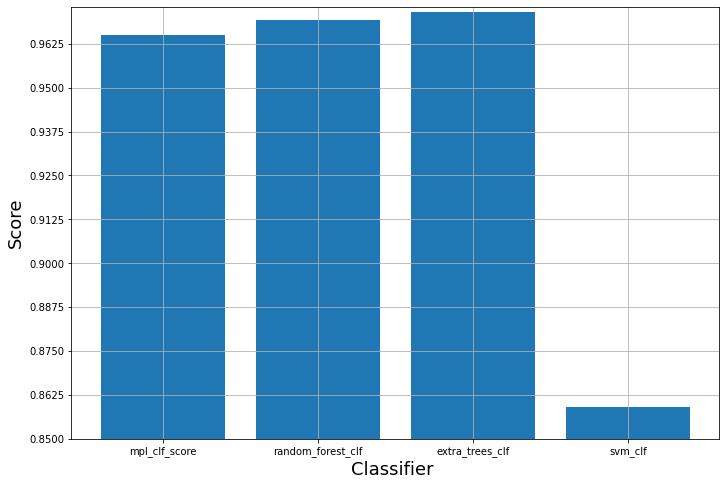

In [342]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
plt.ylim(ymin=0.85)
plt.ylim(ymax=0.973)
plt.ylabel("Score",fontsize=18)
plt.xlabel("Classifier ",fontsize=18)
classifiers = ['mpl_clf_score', 'random_forest_clf', 'extra_trees_clf','svm_clf']
score = [mlp_clf.score(X_val,y_val),random_forest_clf.score(X_val,y_val),extra_trees_clf.score(X_val,y_val),svm_clf.score(X_val,y_val)]
ax.bar(classifiers,score)
plt.yticks(np.arange(0.85, 0.973, 0.0125))
plt.grid()
plt.show()

In [343]:
from sklearn.ensemble import VotingClassifier
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [344]:
voting_clf = VotingClassifier(named_estimators)

In [345]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('mlp_clf', MLPClassifier(random_state=42))])

In [346]:
voting_clf.score(X_val,y_val)

0.9708

In [347]:
voting_clf.estimators

[('random_forest_clf', RandomForestClassifier(random_state=42)),
 ('extra_trees_clf', ExtraTreesClassifier(random_state=42)),
 ('svm_clf', LinearSVC(max_iter=100, random_state=42, tol=20)),
 ('mlp_clf', MLPClassifier(random_state=42))]

In [348]:
voting_clf.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(max_iter=100, random_state=42, tol=20),
 MLPClassifier(random_state=42)]

# As we can see above the score of the ensemble is less than the extra treee classifier so lets delete Linear SVC from the ensemble and check if the performace increases

In [349]:
del voting_clf.estimators_[2]

In [351]:
 voting_clf.score(X_val, y_val)

0.9736

# The score increases from 0.9708 to 0.9736 by removing Linear SVC.

In [381]:
voting_clf.voting = "soft"

In [382]:
soft_voting_score=voting_clf.score(X_val, y_val)
soft_voting_score

0.9714

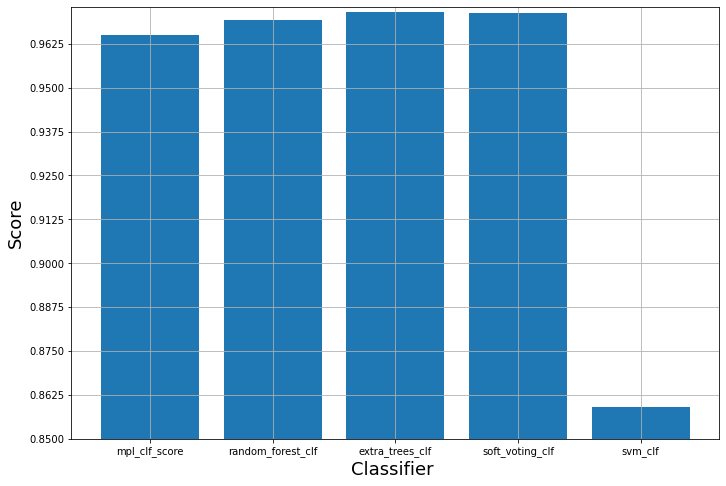

In [383]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
plt.ylim(ymin=0.85)
plt.ylim(ymax=0.973)
plt.ylabel("Score",fontsize=18)
plt.xlabel("Classifier ",fontsize=18)
classifiers = ['mpl_clf_score', 'random_forest_clf', 'extra_trees_clf','soft_voting_clf','svm_clf']
score = [mlp_clf.score(X_val,y_val),random_forest_clf.score(X_val,y_val),extra_trees_clf.score(X_val,y_val),soft_voting_score,svm_clf.score(X_val,y_val)]
ax.bar(classifiers,score)
plt.yticks(np.arange(0.85, 0.973, 0.0125))
plt.grid()
plt.show()

# Soft voting is not a good option here It performs better than MPL and Random forest but it has very close perfromace to extra trees classifier. Even a little lesser than extra trees performance. Extra tree scores 0.9715 where as Soft voting scores 0.9714. Soft voting predicts the class with the highest class probablity averaged over all the indevidual classifiers.

In [384]:
from sklearn.metrics import accuracy_score
hard_voting_clf=accuracy_score(voting_clf.predict(X_test),y_test)
hard_voting_clf#Soft voting accuracy score not the same as score 

0.9689

In [385]:
voting_clf.voting = "hard"
hard_voting_score=voting_clf.score(X_val, y_val)
hard_voting_score

0.9736

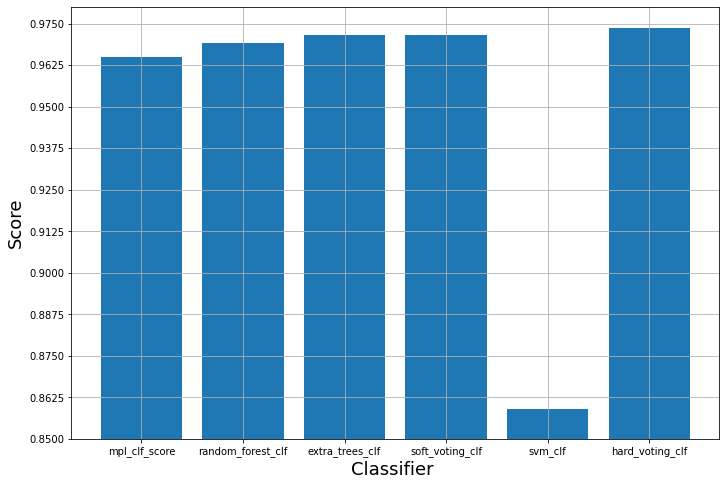

In [387]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
plt.ylim(ymin=0.85)
plt.ylim(ymax=0.980)
plt.ylabel("Score",fontsize=18)
plt.xlabel("Classifier ",fontsize=18)
classifiers = ['mpl_clf_score', 'random_forest_clf', 'extra_trees_clf','soft_voting_clf','svm_clf','hard_voting_clf']
score = [mlp_clf.score(X_val,y_val),random_forest_clf.score(X_val,y_val),extra_trees_clf.score(X_val,y_val),soft_voting_score,svm_clf.score(X_val,y_val),hard_voting_score]
ax.bar(classifiers,score)
plt.yticks(np.arange(0.85, 0.980, 0.0125))
plt.grid()
plt.show()

# Soft voting scores 0.9714 and hard voting scores 0.9736 wich shows that hard voting is better than soft voting in this case. This score is on evaluation sets the following is the score on Test sets.From the above chart we can tell that hard voting has the best performance over the indeviduals models and soft voting.

In [391]:
hard_voting_clf=voting_clf.score(X_test,y_test)
hard_voting_clf

0.9705

In [376]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9645, 0.9691, 0.9633]

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, model_selection
 

In [188]:
import xgboost
from sklearn.metrics import mean_squared_error
if xgboost is  not None:
    xgb_reg=xgboost.XGBRegressor(random_state=42)# Xgboost Regressor
    xgb_reg.fit(X_train, y_train)
    y_pred=xgb_reg.predict(X_val)
    val_error=mean_squared_error(y_val, y_pred)
    print("Validation MSE",val_error)

Validation MSE 1.0060045


In [189]:
 xgb_reg.score(X_test,y_test)

0.8771582425970497

In [190]:
from xgboost import XGBClassifier
clf1=mlp_clf
clf2=random_forest_clf
cllf3=extra_trees_clf
clf4=XGBClassifier(use_label_encoder =False) #xgboost classifier This is our focuse 
clf4.fit(X_train,y_train)


[13:51:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [388]:
y_pred_clf1=clf1.predict(X_test)
y_pred_clf2=clf2.predict(X_test)
y_pred_clf3=cllf3.predict(X_test)
y_predd_clf4=clf4.predict(X_test)


# The following is the accuracy score on the test sets y_predicted over y_yest based on each classifier and ensembles.  

In [392]:
from sklearn.metrics import accuracy_score
print("mpl_clf_score",accuracy_score(y_pred_clf1,y_test))
print("random_forest_clf",accuracy_score(y_pred_clf2,y_test))
print("extra_trees_clf",accuracy_score(y_pred_clf3,y_test))
print("XGBClassifier_clf",accuracy_score(y_predd_clf4,y_test))
print("hard_voting_clf",hard_voting_clf)# hard_voting accuracy score calculated before
print("soft_voting_clf",soft_voting_clf)# soft_voting accuracy score calculated before

mpl_clf_score 0.9633
random_forest_clf 0.9645
extra_trees_clf 0.9691
XGBClassifier_clf 0.9739
hard_voting_clf 0.9705
soft_voting_clf 0.9705


In [396]:
clf4.score(X_val,y_val)# clf4 is XGBoost classifier

0.9777

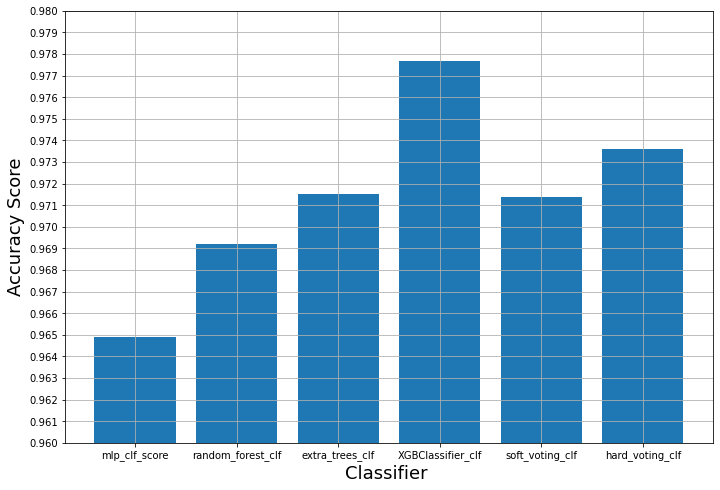

In [395]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
plt.ylim(ymin=0.96)
plt.ylim(ymax=0.98)
plt.ylabel("Accuracy Score",fontsize=18)
plt.xlabel("Classifier ",fontsize=18)
classifiers = ['mlp_clf_score', 'random_forest_clf', 'extra_trees_clf', 'XGBClassifier_clf','soft_voting_clf','hard_voting_clf']
score = [mlp_clf.score(X_val,y_val),random_forest_clf.score(X_val,y_val),extra_trees_clf.score(X_val,y_val),clf4.score(X_val,y_val),soft_voting_score,hard_voting_score]
ax.bar(classifiers,score)
plt.yticks(np.arange(0.96, 0.98, 0.001))
plt.grid()
plt.show()


# As we can see from the above bar chart xgboost classifier has the highest score among the other three separate classifiers as well as hard and soft voting ensmble methods. Numerically XGBClassifier scores 0.9777 which is 97.77% accuracy score over the validation sets and 0.9739 / 97.39 % over the test sets which is The highest score when compared with the others.